# 1. Business Understanding
 
Students are expected to identify a data analytics task of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

**1.What is the business problem that you are trying to solve?**  <br>

**Ans.** A manufacturing company is experiencing frequent breakdowns and unplanned downtime in their production line, resulting in significant losses in productivity and revenue. The company's current maintenance strategy is reactive, which means they only perform maintenance after a piece of equipment has failed. This approach leads to extended downtime, costly repairs, and reduced machine lifespan.

**2. What data do you need to answer the above problem?**

**Ans.**  We need to implement a proactive maintenance approach to prevent equipment failures and minimize downtime, for which we need sensor data of these equipment, including data such as vibration, temperature, pressure, etc. By analysing these data and implementing predictive maintenance techniques that leverage data analytics and machine learning algorithms to predict equipment failure.

**3. What are the different sources of data?**

**Ans.** The data sources in this case mostly comes from the various sensors that are built into these machines which collects parameters like the temperature, the pressure, vibration etc. These data can be sent to server as streaming data. Once the data is received at the server a ML model is run on every set of data to detect failure. 

**4. What kind of analytics task are you performing?**

**Ans.** We are performing Predictive Analytics  as we are trying to predict the future trends (i.e. what is likely to happen)

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [1]:
##---------Type the code below this line------------------##

#### Import libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import precision_recall_fscore_support, plot_roc_curve
import time
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
url='https://drive.google.com/file/d/1qNzIVSzgYUl-rozBTh9Pz8ujjPDvQAJR/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

## 2.2 Code for converting the above downloaded data into a dataframe

In [4]:
##---------Type the code below this line------------------##

In [5]:
data_df = pd.read_csv(url)

## 2.3 Confirm the data has been downloaded correctly by displaying the first 5 and last 5 records.

In [6]:
##---------Type the code below this line------------------##

In [7]:
data_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
data_df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
10066,170,L47349,L,298.4,308.3,1318,59.1,22,0,No Failure
10067,171,M15030,M,298.4,308.2,1610,35.0,24,0,No Failure
10068,172,L47351,L,298.2,308.1,1462,50.8,27,0,No Failure
10069,173,M15032,M,298.1,308.0,1924,20.8,29,0,No Failure
10070,174,M15033,M,298.2,308.0,1591,33.7,32,0,No Failure


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [9]:
##---------Type the code below this line------------------##

In [10]:
data_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10071 entries, 0 to 10070
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10071 non-null  int64  
 1   Product ID               10071 non-null  object 
 2   Type                     10071 non-null  object 
 3   Air temperature [K]      10071 non-null  float64
 4   Process temperature [K]  10060 non-null  float64
 5   Rotational speed [rpm]   10071 non-null  int64  
 6   Torque [Nm]              10071 non-null  float64
 7   Tool wear [min]          10071 non-null  int64  
 8   Target                   10071 non-null  int64  
 9   Failure Type             10071 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 786.9+ KB


In [12]:
data_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10071.000000,10071.000000,10060.000000,10071.000000,10071.000000,10071.000000,10071.000000
mean,4966.226690,295.981134,309.994751,1538.678086,39.990607,108.016682,0.033959
std,2905.317511,33.161037,1.484650,179.067366,9.965602,63.642729,0.181132
min,1.000000,24.950000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2447.500000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,4965.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7482.500000,301.500000,311.100000,1612.000000,46.750000,162.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

**1. Size of the dataset <br>**
Ans. The dataset has 10071 rows and 10 columns (10071,10)
<br>

**2. What type of data attributes are there? <br>**
Ans. We have the following types of data attribute.
     1   UDI -                  
     2   Product ID - Nominal            
     3   Type - Nominal                   
     4   Air temperature [K]  - Ratio (Numerical)    
     5   Process temperature [K]  - Ratio (Numerical) 
     6   Rotational speed [rpm]  - Ratio (Numerical) 
     7   Torque [Nm] - Ratio (Numerical)            
     8   Tool wear [min] - Ratio (Numerical)       
     9   Target - Nominal                
     10   Failure Type - Nominal
<br>

**3. Is there any null data that has to be cleaned?<br>**
Ans. If we see the info(), we can see feature/column "Process temperature [K]" has 10060 non-null values out of total 10071 rows. So we have 11 null values in column "Process temperature [K]" .

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [13]:
##---------Type the code below this line------------------##

#### Duplicate Data check

In [14]:
duplicateRows = data_df[data_df.duplicated()]

In [15]:
duplicateRows.shape

(69, 10)

In [16]:
duplicateRows.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
10000,104,M14963,M,298.8,308.8,1441,40.5,63,0,No Failure
10001,105,L47284,L,298.8,308.7,1450,43.4,66,0,No Failure


We have 69 duplicate rows, and as we have not used 'subset' parameter in the duplicated function, it means the complete rows are duplicate. 

#### Missing Data Check

In [17]:
data_df.isnull().sum()

UDI                         0
Product ID                  0
Type                        0
Air temperature [K]         0
Process temperature [K]    11
Rotational speed [rpm]      0
Torque [Nm]                 0
Tool wear [min]             0
Target                      0
Failure Type                0
dtype: int64

We have 11 rows missing for column Process temperature [K] 

#### Data Inconsistencies Check

sns.boxplot(data_df_not_null['Process temperature [K]'])

In [18]:
data_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10071.000000,10071.000000,10060.000000,10071.000000,10071.000000,10071.000000,10071.000000
mean,4966.226690,295.981134,309.994751,1538.678086,39.990607,108.016682,0.033959
std,2905.317511,33.161037,1.484650,179.067366,9.965602,63.642729,0.181132
min,1.000000,24.950000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2447.500000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,4965.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7482.500000,301.500000,311.100000,1612.000000,46.750000,162.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Looking closely at Air Temperature, we can see that Min value of Air Temperature is 24.95 but on seeing the mean, 25%, 50% and 75%, we can see that the data ranges close to 298.3. So these data can be outliers.

<AxesSubplot:xlabel='Air temperature [K]'>

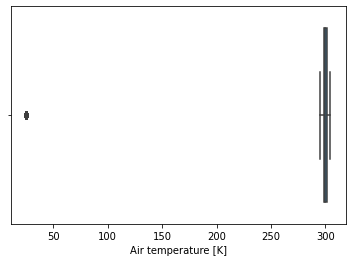

In [19]:
sns.boxplot(data=data_df, x="Air temperature [K]")

From the box plot, we can say that it is not just outlier but incorrect data, as the data is way too less than the range of data.
There can be few possible conditions:
1. Data is incorrect (entered number is random error) - In this case we can either remove these records or impute them.
2. Data unit is incorrectly recorded. - In this case we can bring the data onto the same scale.

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [20]:
##---------Type the code below this line------------------##

#### Remove Duplicate Data

While using the duplicated function we have not used the 'subset' parameter, which means the complete rows are duplicate. <br>
Secondly, if we see the data, we have a column UDI, which kind of acts as a serial number for the observations. So now the duplicate date has the same serial number as well, so it is safe to delete the duplicate rows.  <br>
We can keep the 1st occurance of the duplicate rows as all occurance are the same.

In [21]:
data_df = data_df.drop_duplicates(keep='first')

In [22]:
data_df.shape

(10002, 10)

#### Impute/Drop Missing Data

In [23]:
data_df[data_df['Process temperature [K]'].isna()]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
16,17,M14876,M,298.6,NaN,1311,46.6,44,0,No Failure
125,126,L47305,L,298.9,NaN,1560,32.2,118,0,No Failure
299,300,M15159,M,297.8,NaN,1567,35.6,131,0,No Failure
364,365,L47544,L,297.6,NaN,1407,55.2,86,0,No Failure
528,529,M15388,M,297.5,NaN,1553,42.4,60,0,No Failure
666,667,L47846,L,297.5,NaN,1470,43.5,191,0,No Failure
3475,3476,L50655,L,301.8,NaN,1644,33.4,68,0,No Failure
5380,5381,L52560,L,302.8,NaN,1494,37.5,198,0,No Failure
6576,6577,L53756,L,301.5,NaN,1644,34.9,186,0,No Failure
6589,6590,M21449,M,301.6,NaN,1553,38.9,0,0,No Failure


Percentage of records having missing value:

In [24]:
(data_df['Process temperature [K]'].isnull().sum()) / (data_df.shape[0]) *100

0.10997800439912019

As all records are of Failure Type "No Failure", Percentage of "No Failure" records are null

In [25]:
(data_df['Process temperature [K]'].isnull().sum()) / (data_df[data_df['Failure Type']== 'No Failure'].shape[0]) *100

0.11394240729231406

As we can see we have only 0.1% of data with missing rows,  <br>
and 0.11% from the Failure Type "No Failure", so we can safely drop these rows. <br>

In case this percentage was higher we could have imputed the mean of the Process temperature as from data_df.describe() we can see the data for Process temperature falls in range of 305 to 314. To make it further accurate we could have taken mean from the specific "Type"

In [26]:
data_df.dropna(axis=0, inplace=True)

In [27]:
data_df['Process temperature [K]'].isnull().sum()

0

#### Remove Data Inconsistencies

From the box plot in above section, we can say that it is not just outlier but incorrect data, as the data is way too less than the range of data.
There can be few possible conditions:
1. Data is incorrect (entered number is random error) - In this case we can either remove these records or impute them.
2. Data unit is incorrectly recorded. - In this case we can bring the data onto the same scale.

Let us check if the data has **Data Confirmity** issue i.e. Data is inserted with different measurement unit.<br>

Next Step: <br>
we assume that these inconsistent data is either in Fahrenheit or Celsius, we convert these  to kelvin and if the data falls in range of our records, we can apply imputation

Finding Outlier rows

In [28]:
Q1 = np.percentile(data_df['Air temperature [K]'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_df['Air temperature [K]'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
lower_bound = Q1-1.5*IQR

In [29]:
data_df[data_df['Air temperature [K]']<=lower_bound]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
5,6,M14865,M,24.95,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,24.95,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,24.95,308.6,1527,40.2,16,0,No Failure
172,173,M15032,M,24.95,308.0,1924,20.8,29,0,No Failure
182,183,M15042,M,24.95,308.2,1342,48.1,54,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9228,9229,M24088,M,24.95,309.1,1572,37.5,126,0,No Failure
9229,9230,M24089,M,24.95,309.0,2042,17.8,129,0,No Failure
9236,9237,L56416,L,24.95,308.7,1556,31.6,145,0,No Failure
9237,9238,M24097,M,24.95,308.8,1811,25.4,147,0,No Failure


We have 148 such rows which have outliers for "Air temperature [K]" feature, checking the values these contains

In [30]:
data_df[data_df['Air temperature [K]']<=lower_bound]['Air temperature [K]'].unique()

array([24.95])

All these 148 records have the same "Air temperature [K]" value. <br>
Next we assume this to be in degree celsius  as these are very low in number and convert it to Kelvin.

In [31]:
kelvin_temp = 24.95 + 273.15
print(kelvin_temp)

298.09999999999997


This kelvin value does fall close to Q2, so we can convert the degree celcius data to kelvin to remove inconsistency  in our data.

In [32]:
data_df.loc[data_df['Air temperature [K]'] <= lower_bound, 'Air temperature [K]'] = data_df['Air temperature [K]'] + 273.15

<AxesSubplot:xlabel='Air temperature [K]'>

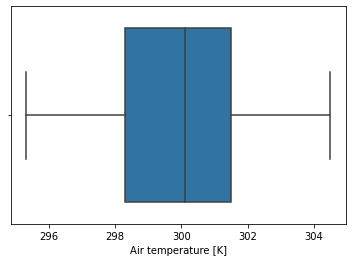

In [33]:
sns.boxplot(data=data_df, x="Air temperature [K]")

Now, the feature 'Air temperature [K]' has consistent data.

## 3.3 Encode categorical data

In [34]:
##---------Type the code below this line------------------##

In [35]:
#Creating a backup of data before encoding the categorical variables. This might be helpful at analysing the data further.
data_df_backup = data_df.copy()

In [36]:
data_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


We can clearly see we have the following categorical variables:
1. Type
2. Target
3. Failure Type

In [37]:
data_df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [38]:
data_df['Target'].unique()

array([0, 1])

In [39]:
data_df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

**Type** - Has no order we can apply one-hot encoding. <br>
**Target** - It is already in encoded format. <br>
**Failure Type** - This being our target variable we can apply label encoding. <br>

**Type**

In [40]:
y = pd.get_dummies(data_df.Type, prefix='Type', drop_first=True)
print(y.head())

   Type_L  Type_M
0       0       1
1       1       0
2       1       0
3       1       0
4       1       0


In [41]:
#y.drop('Type_M', axis=1, inplace=True)

In [42]:
data_df = data_df.join(y)

In [43]:
data_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,1,0


In [44]:
data_df.drop(['Type'], axis=1, inplace=True)

In [45]:
data_df.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,No Failure,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,No Failure,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,No Failure,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,No Failure,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,No Failure,1,0


**Failure Type**

In [46]:
label_encoder = LabelEncoder()

In [47]:
data_df['Failure Type']= label_encoder.fit_transform(data_df['Failure Type'])

In [48]:
data_df.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,1,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,1,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,1,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,1,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,1,1,0


## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [49]:
##---------Type the code below this line------------------##

In [50]:
##---------Type the code below this line------------------##

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

In [51]:
##---------Type the code below this line------------------##

In [52]:
##---------Type the code below this line------------------##

**To remove duplicate data**

While using the duplicated function we have not used the 'subset' parameter, which means the complete rows are duplicate. <br>
Secondly, if we see the data, we have a column UDI, which kind of acts as a serial number for the observations. So now the duplicate date has the same serial number as well, so it is safe to delete the duplicate rows.  <br>
We can keep the 1st occurance of the duplicate rows as all occurance are the same.

**To impute or remove missing data**

On analysis we found we have only 0.1% of data with missing rows,  <br>
Now all these missing rows were from the same Failure Type(this column is our target variable) "No Failure", so we analysed how much percent of rows have missing data with Failure type as "No Failure". <br>
We found these missing records contribute to 0.11% from the Failure Type "No Failure.
Hence we concluded that we can safely drop these rows. <br>

**To remove data inconsistencies**

From the box plot we could say that it is not just outlier but incorrect data, as the data is way too less in scale. (Below the lower bound). <br>
As all records were in Kelvin(i.e. 289) and these inconsistent data were very less in scale(i.e. 24), so we checked if the data has **Data Confirmity** issue i.e. Data is inserted with different measurement unit.<br>
Considering the inconsistent data to be in celsius (As the numbers were less in magnitude), we converted them to kelvin ( by adding 273.15 and found the results fit perfectly in the range, thus removing the Data Conformity issue.

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [53]:
##---------Type the code below this line------------------##

In [54]:
data_df.head(2)

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,1,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,1,1,0


From the above table, we can see we have 2 columns that can be used as Target (y).
1. Target - having value 0 and 1, which says if a failure has occurred. 
2. Failure Type - Which has the type of failure that has occurred.

For this problem statement we shall use Failure Type as dependent variable(Target or y), as it specifies the type of failure when a failure occurs.

In [55]:
X = data_df[['Air temperature [K]', 'Type_M', 'Type_L', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data_df['Failure Type']

In [56]:
X.head()

,Air temperature [K],Type_M,Type_L,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,1,0,308.6,1551,42.8,0
1,298.2,0,1,308.7,1408,46.3,3
2,298.1,0,1,308.5,1498,49.4,5
3,298.2,0,1,308.6,1433,39.5,7
4,298.2,0,1,308.7,1408,40.0,9


In [57]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Failure Type, dtype: int64

We have already applied Label Encoder on the Target variable in the above pre-processing step.  <br>
As we have multiple classes in the Target variable and they are not ordinal, we should ideally use a One-hot encoder.  <br>
But using one hot encoding would make the problem multi-label, which would make the problem much more complex for the model and would very likely lead to lower performance, or it would require much more data in order to reach the same performance as regular classification. Hence we prefer to go with Label Encoding technique.

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

In [58]:
##---------Type the code below this line------------------##

In [59]:
data_df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

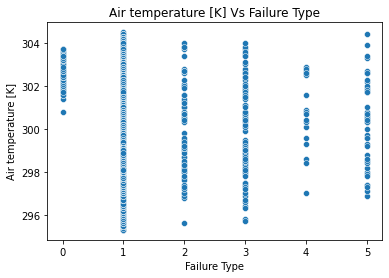

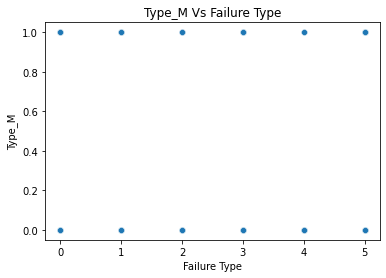

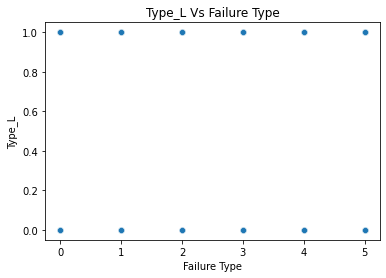

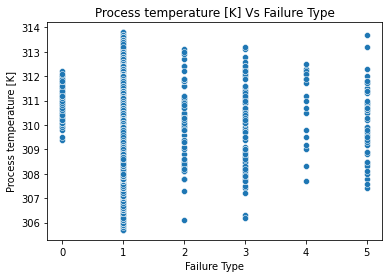

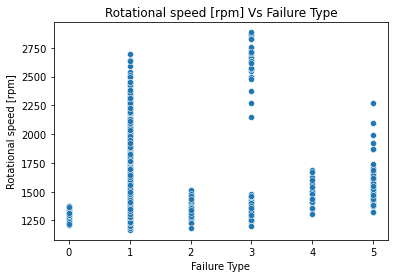

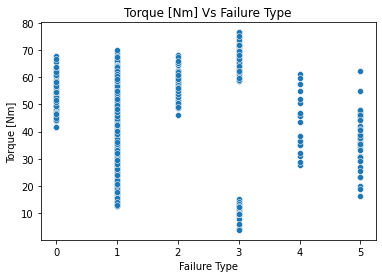

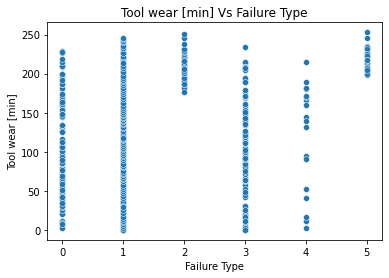

In [60]:
for column in X.columns:
    sns.scatterplot(data=data_df, x=data_df["Failure Type"], y=data_df[column])
    plt.xlabel("Failure Type",fontsize=10)
    plt.ylabel(column,fontsize=10)
    plt.title(column + " Vs Failure Type")
    plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [61]:
##---------Type the code below this line------------------##

First choice of plot is Heat Map, as heat map shows the correlation between the different features. Higher correlation between the target and the dependent variable implies the dependent variable is better at predicting the target.
<br>
Secondly we also can find dependent variables/features that are highly correlated, when two dependent variables are highly correlated they tend to give the same information and are redundant, thus we can remove one of them. Thus it helps in feature selection too.

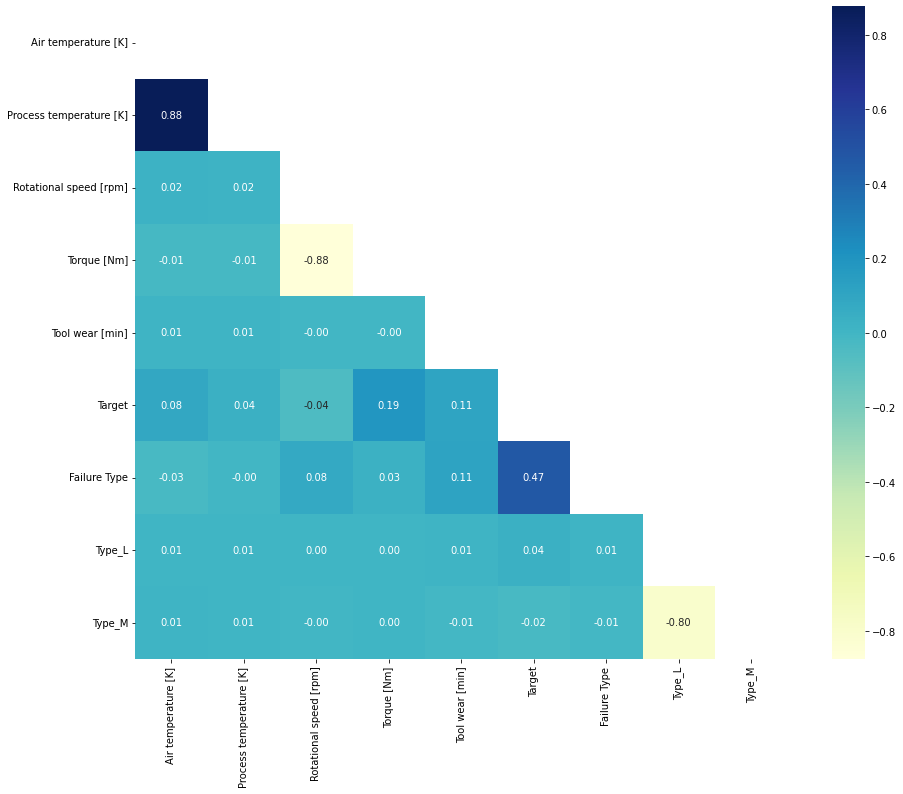

In [62]:
data_df_corr = data_df.corr(method='pearson')
mask = np.triu(np.ones_like(data_df_corr))

plt.figure(figsize=(16, 12))
sns.heatmap(data_df_corr, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap = 'YlGnBu')
plt.show()

From the heat map we can see "Tool wear" and "Torque" has the highest correlation with Target. <br>
"Torque" and "Rotational speed" have the highest correlation with Failure Type.


Secondly we can see a very high correlation between "Process Temperature" and "Air Temperature", so these two shall provide the same information. We shall not remove any of them now, we shall further test this using statistical technique.

Now let us consider box plots which will give us a clear idea at what values of each feature a failure occurs. This will also help us understand which features are best for predicting the Target variable


In [63]:
data_df.columns[:5]

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

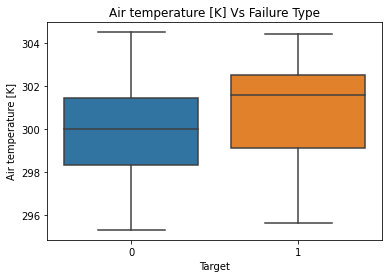

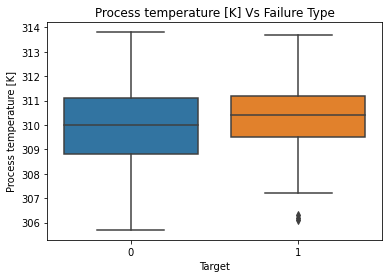

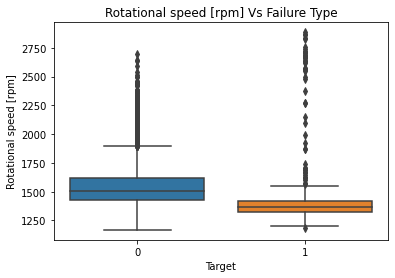

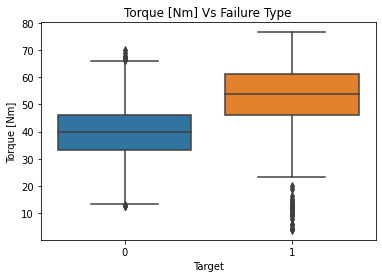

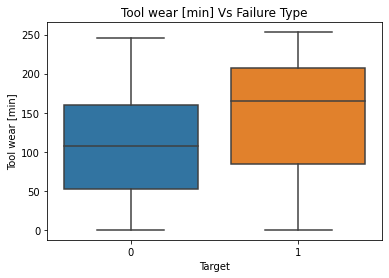

In [64]:
for col in data_df.columns[:5]:
  sns.boxplot(data=data_df, x="Target", y=col)
  plt.xlabel("Target",fontsize=10)
  plt.ylabel(col,fontsize=10)
  plt.title(col + " Vs Failure Type")
  plt.show()

From the above plots we can say Failure occurs  when


1.   Temperature  is high.
2.   Rotational Speed is less
3.   Torque is high.
4.   Tool wear is high.



# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

In [65]:
##---------Type the code below this line------------------##

In [66]:
X.head(2)

,Air temperature [K],Type_M,Type_L,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,1,0,308.6,1551,42.8,0
1,298.2,0,1,308.7,1408,46.3,3


**Continious Features and Failure Type**<br>


> Air temperature [K],Process temperature [K], Rotational speed [rpm],	Torque [Nm],	Tool wear [min] are all continuous variables.
Failure Type is Categorical
<br>We will have to discretise these features and then apply Information Gain.


In [67]:
X.drop(['Type_M', 'Type_L'], axis=1).columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

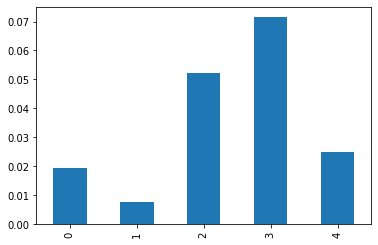

In [68]:
importances = mutual_info_classif(X.drop(['Type_M', 'Type_L'], axis=1),y.values.ravel())
feat_importances = pd.Series(importances)
feat_importances.plot(kind='bar')
plt.show()

From the above plot we can clearly state that 'Rotational speed [rpm]', 'Torque [Nm]' are the most significant features and 'Process temperature [K]' being the least significant



**Categorical Features and Failure Type**

> "Type" categorical feature and its significance with the Failure Type (Target Variable). We shall use chi2 test.



In [69]:
data_df_backup.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Below is a contingency table to show the relationship between the Machine Type and Failure Type

In [70]:
contingency_table  = pd.crosstab(index=data_df_backup['Type'], columns=data_df_backup['Failure Type'])
contingency_table 

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Type,,,,,,
H,8,979,1,5,4,6
L,74,5752,73,59,12,25
M,30,2912,4,31,2,14


In [71]:
#table = [[8,979,1,5,4,6], [74,5752, 73, 59, 12, 25], [30,2912, 4, 31, 2, 14]]
stat, p, dof, expected = chi2_contingency(contingency_table)

In [72]:
# interpret p-value
alpha = 0.05
print("p value is " + str(p))

p value is 8.601917351672247e-07


As P value > alpha so Null hypothesis holds true and So the variable is independent.

From the above chi-square test we can see that the targer variable "Failure Type" is not dependent on feature "Type"

So top 5 feature for model training are:

1.   Air temperature [K]
2.   Process temperature [K]
3.   Rotational speed [rpm]
4.   Torque [Nm]
5.   Tool wear [min]

Let us update the X

In [73]:
X = data_df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data_df['Failure Type']

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

In [74]:
##---------Type the code below this line------------------##

**Method 1: Mutual Information (Information Gain)**  <br>
As we had most of the features as numeric and target variable as categorical we used Mutual Information (Information Gain). As information Gain helps us to measure independence between the features and the target variable and that is exactly what we need to select top 5 features.

We found that 'Rotational speed [rpm]', 'Torque [Nm]' are the most significant features and 'Process temperature [K]' being the least significant features for target "Failure Type".

**Method 2: chi-squared test** <br>
For the categorical feature "Type",
 we selected chi-square test as both the feature and target variables
 are of categorical type and chi-square test allows us to see whether
 or not two categorical variables are related or not.
Thus this helped in top 5 feature selection.

We found that the feature "Type" and target "Failure Type" are independent. 

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms
1. Classification -- Decision Tree classifier 

2. Clustering -- kmeans

3. Association Analysis

4. Anomaly detection

5. Textual data -- Naive Bayes classifier (not taught in this course)

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

In [75]:
##---------Type the code below this line------------------##


ML techniques we want to use is **Classification**. As we want to build a model that can take in the various features (like the Temperature, pressure, rotation speed etc) and predict what type of failure might occur.

1st Classification technique is **Decision Tree with criterion='gini'**. <br>
 The gini index uses probability to minimise misclassification.

**Sampling Data and Test Train Split**

As the data has a higher number of records for Failure Type "No Failure", we need to perform sampling of data in order to remove bias from the data.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, stratify=y)

In [77]:
y_train.value_counts()

1    8678
0     101
3      85
2      70
5      41
4      16
Name: Failure Type, dtype: int64

**Feature Scaling**

In [78]:
scaler = StandardScaler()

X_train   = scaler.fit_transform(X_train)     
X_test    = scaler.fit_transform(X_test)  

**Model Training**

In [79]:
start_time_dt = time.time()
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
end_time_dt = time.time()

**Model evaluation**

As we are trying to predict failure, we want to reduce false negatives.
So the most important metrics for evaluation are Sensitivity or Recall.


In [80]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt, recall_dt, f1_score_dt, support_dt = precision_recall_fscore_support(y_test, y_pred_dt, average='macro')

In [81]:
print('Decision Tree with criterion gini')
print('Accuracy:', accuracy_dt)
print('Model Training Time:', end_time_dt - start_time_dt)
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt))

Decision Tree with criterion gini
Accuracy: 0.976
Model Training Time: 0.06754589080810547

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.99      0.99      0.99       965
           2       0.56      0.62      0.59         8
           3       0.64      0.90      0.75        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4

    accuracy                           0.98      1000
   macro avg       0.53      0.56      0.54      1000
weighted avg       0.98      0.98      0.98      1000



In [82]:
confusion_dt = confusion_matrix(y_test, y_pred_dt)
confusion_dt.ravel() 

array([  9,   2,   0,   0,   0,   0,   0, 953,   4,   4,   1,   3,   0,
         1,   5,   1,   0,   1,   0,   1,   0,   9,   0,   0,   0,   2,
         0,   0,   0,   0,   0,   4,   0,   0,   0,   0])

## 6.2 ML technique 2 + Justification

In [83]:
##---------Type the code below this line------------------##

Second technique we can use to solve the multi-class classification problem is **KNN**. <br>
 KNN algorithm plots the data and finds 
the K nearest neighbors using distance measuring algorithm and based on its neighbours category it decide which category it belongs to.
This makes KNN is a very good technique for multi class classification. 


As we have already performed Test Train Split, Feature scaling in the above section, we can directly train the model.

In [84]:
start_time_knn = time.time()
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred_knn = knn_clf.predict(X_test)
end_time_knn = time.time()

In [85]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn, recall_knn, f1_score_knn, support_knn = precision_recall_fscore_support(y_test, y_pred_knn, average='macro')

In [86]:
print('KNN')
print('Accuracy:', accuracy_knn)
print('Model Training Time:', end_time_knn - start_time_knn)
print('\nClassification Report:')
print(classification_report(y_test, y_pred_knn))

KNN
Accuracy: 0.976
Model Training Time: 0.209089994430542

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.98      1.00      0.99       965
           2       0.57      0.50      0.53         8
           3       1.00      0.70      0.82        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4

    accuracy                           0.98      1000
   macro avg       0.59      0.40      0.44      1000
weighted avg       0.97      0.98      0.97      1000



In [87]:
confusion_knn = confusion_matrix(y_test, y_pred_knn)
confusion_knn.ravel() 

array([  2,   9,   0,   0,   0,   0,   0, 963,   2,   0,   0,   0,   0,
         4,   4,   0,   0,   0,   0,   2,   1,   7,   0,   0,   0,   2,
         0,   0,   0,   0,   0,   4,   0,   0,   0,   0])

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [88]:
##---------Type the code below this line------------------##

In [89]:
models = ['Decision Tree with Gini Index', 'KNN']
accuracies = [accuracy_dt, accuracy_knn]
precisions = [precision_dt, precision_knn]
recalls = [recall_dt, recall_knn]
f1_scores = [f1_score_dt, f1_score_knn]

training_times = [end_time_dt - start_time_dt, end_time_knn - start_time_knn]

performance_df = pd.DataFrame({
'Model': models,
'Accuracy': accuracies,
'Precision': precisions,
'Recall': recalls,
'Training Time (s)': training_times,
'F1 Scores': f1_scores
})

print(performance_df)

                           Model  Accuracy  Precision    Recall  \
0  Decision Tree with Gini Index     0.976   0.531338  0.555124   
1                            KNN     0.976   0.591681  0.396624   

   Training Time (s)  F1 Scores  
0           0.067546   0.537804  
1           0.209090   0.442126  


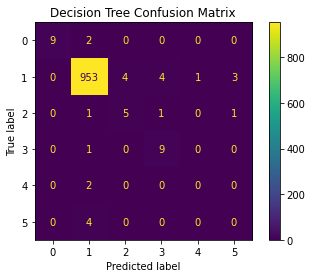

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_dt, display_labels=dt.classes_)
disp.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()


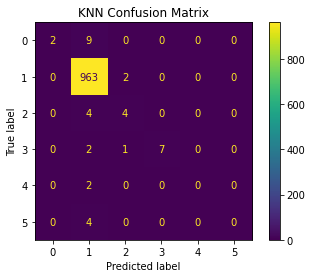

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_knn, display_labels=dt.classes_)
disp.plot()
plt.title("KNN Confusion Matrix")
plt.show()

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

As the manufacturing current maintenance strategy is reactive, which means they only perform maintenance after a piece of equipment has failed.  <br>
We built a solution which can forecast the failure thus helping businesses  to act proactively. This solution can be extended  to forecast the failure well in advance so that the failure can be avoided thus reducing cost of maintainace, reducing downtime and increasing machine efficiency.


**Learnings**  <br>

We had several lessons learnt while solving the problem. Some of them are as stated below.

1. Data collected and understanding is very critical along with the business understanding.
2. Analysis and preprocessing of data is very crucial, as with inconsistent data ML models will not not perform well. 
3. There are several techniques to solve a particular step (i.e removing or imputing the missing values, but we need to analyse the data and take a decision on what action should be performed, there is no single go to formula for this)



##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!